In [2]:
import numpy as np
import pandas as pd
import random

# Gathering data
df = pd.read_csv("Sprint 1 - Movies Data Set Analysis/movies.csv")
# remove the column "Summary"
df = df.drop(columns=["Summary"])
# Make all the column names lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Remove the last row of the DF (containing NaNs))
df.drop(df.tail(1).index, inplace=True)

In [3]:
display(df.tail(5))  # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN


In [4]:
# Fill NaNs with a random value between (mean — 2 * std) & (mean + 2 * std)


def nan_rand_fill(data, key):
    mn = data[key].mean()
    sd = data[key].std()
    low_l = mn - 2 * sd
    high_l = mn + 2 * sd
    nans = data[key].isna()
    df.loc[nans, key] = [
        abs(np.floor(random.uniform(low_l, high_l)))
        if "count" in key
        else abs(round(random.uniform(low_l, high_l), 1))
        for i in range(nans.sum())
    ]


# nan_rand_fill(df, "rating")
# nan_rand_fill(df, "rating_count")

In [5]:
df = df.drop(df[df["title"] == "The Blair Witch Project"].index)

In [6]:
# Fill NaNs with a median value
# df["rating"].fillna(value=df["rating"].median(), inplace=True)

In [7]:
display(df.tail(5))  # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN


In [8]:
print(df.shape)  # Shape of the Data Frame

(614, 10)


In [9]:
print(df.dtypes)  # Column names with their data types

movieid           int64
title            object
mpaa_rating      object
budget          float64
gross           float64
release_date     object
genre            object
runtime         float64
rating          float64
rating_count    float64
dtype: object


In [10]:
print(df.columns)  # Column names

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count'],
      dtype='object')


In [11]:
print(df.isna().sum())  # Column names with their NaN count

movieid           0
title             0
mpaa_rating       0
budget            0
gross             0
release_date      0
genre             0
runtime           0
rating          107
rating_count    107
dtype: int64


In [12]:
# Remove row duplicates by title and release date
df.drop_duplicates(subset=["title", "release_date"])  

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000.0,2.960000e+08,1989-10-12,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,1.457933e+08,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,7.107992e+07,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,1.610017e+08,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,8.443162e+07,1989-04-21,Drama,107.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN


In [13]:
df.drop(['movieid'], axis=1, inplace=True)  # Drop Movie ID column

In [14]:
# Convert data types (Converted float64 to int64 so the high gross and budget values won't overflow the int)

df["budget"] = df["budget"].astype(np.int64)
df["gross"] = df["gross"].astype(np.int64, errors="raise")
df["release_date"] = pd.to_datetime(df["release_date"])

In [15]:
print(df.dtypes)

title                   object
mpaa_rating             object
budget                   int64
gross                    int64
release_date    datetime64[ns]
genre                   object
runtime                float64
rating                 float64
rating_count           float64
dtype: object


In [16]:
df.tail(10)

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
605,Pokemon Detective Pikachu,PG,150000000,431600000,2019-05-03,Mystery,104.0,NaN,NaN
606,Spider-Man: Far from Home,PG-13,160000000,1131000000,2019-06-26,Action,129.0,NaN,NaN
607,Dumbo,PG,170000000,353000000,2019-03-11,Adventure,112.0,NaN,NaN
608,Captain Marvel,PG-13,175000000,1128000000,2019-02-27,Action,124.0,NaN,NaN
609,Aladdin,PG,183000000,1049000000,2019-05-08,Fantasy,128.0,NaN,NaN
610,Godzilla: King of the Monsters,PG-13,200000000,385900000,2019-05-13,Adventure,132.0,NaN,NaN
611,Toy Story 4,G,200000000,1062000000,2019-06-11,Animation,100.0,NaN,NaN
612,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000,759400000,2019-07-13,Thriller,136.0,NaN,NaN
613,The Lion King,PG,250000000,1632000000,2019-07-09,Drama,118.0,NaN,NaN
614,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,NaN,NaN


In [17]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross
display(df[(df["rating"] > 7) & (df["gross"] > 50000000)])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
3,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145.0,7.2,91415.0
4,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
6,When Harry Met Sally...,R,16000000,92800000,1989-07-21,Romance,96.0,7.6,180871.0
...,...,...,...,...,...,...,...,...,...
505,Big Hero 6,PG,165000000,652105443,2014-10-24,Animation,102.0,7.8,380953.0
506,Interstellar,PG-13,165000000,675120017,2014-11-05,Science Fiction,169.0,8.6,1343549.0
507,Captain America: The Winter Soldier,PG-13,170000000,714766572,2014-03-20,Action,136.0,7.7,685903.0
508,Dawn of the Planet of the Apes,PG-13,170000000,710644566,2014-06-26,Science Fiction,130.0,7.6,395425.0


In [18]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross & with Parental guidance as MPAA Rating
display(df[(df["rating"] > 7) & (df["gross"] > 50000000) & (df["mpaa_rating"] == "PG")])


,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
4,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
7,Dead Poets Society,PG,16400000,235860116,1989-06-02,Drama,129.0,8.1,382002.0
13,Batman,PG,35000000,411348924,1989-06-23,Action,126.0,7.5,319517.0
15,The Little Mermaid,PG,40000000,222300000,1989-11-17,Animation,83.0,7.6,219221.0
16,Back to the Future Part II,PG,40000000,332000000,1989-11-20,Science Fiction,108.0,7.8,438940.0
19,Steel Magnolias,PG,15000000,95904091,1989-11-15,Drama,119.0,7.3,43037.0
24,Home Alone,PG,18000000,476684675,1990-11-09,Family,103.0,7.6,414472.0
32,The Hunt for Red October,PG,30000000,199200000,1990-03-02,Thriller,134.0,7.6,167212.0


In [19]:
# Count of Animation movies with more than 7 in Rating (use the shape() function)
print(df[(df["genre"] == "Animation") & (df["rating"] > 7)].shape[0])

39


In [20]:
# Show the list of top 5 movies based on Budget
display(df.sort_values("budget", ascending=False).head(5))

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,Avengers: Infinity War,PG-13,400000000,2048000000,2018-04-23,Action,149.0,NaN,NaN
454,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000,1045713802,2011-05-14,Action,136.0,6.6,455211.0
614,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,NaN,NaN
574,Star Wars: The Last Jedi,PG-13,317000000,1333000000,2019-12-09,Science Fiction,152.0,NaN,NaN
573,Justice League,PG-13,300000000,657900000,2017-11-15,Action,120.0,NaN,NaN


In [21]:
df.nlargest(5, 'budget')

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,Avengers: Infinity War,PG-13,400000000,2048000000,2018-04-23,Action,149.0,NaN,NaN
454,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000,1045713802,2011-05-14,Action,136.0,6.6,455211.0
614,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,NaN,NaN
574,Star Wars: The Last Jedi,PG-13,317000000,1333000000,2019-12-09,Science Fiction,152.0,NaN,NaN
375,Pirates of the Caribbean: At World's End,PG-13,300000000,961000000,2007-05-19,Adventure,169.0,7.1,565402.0


In [22]:
# Show the top 5 Comedy movies by Rating
display(df[df["genre"] == "Comedy"].sort_values("rating", ascending=False).head(5))   

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
111,Forrest Gump,PG-13,55000000,677945399,1994-07-06,Comedy,142.0,8.8,1657851.0
185,The Truman Show,PG,60000000,264118201,1998-06-04,Comedy,103.0,8.1,859224.0
80,Groundhog Day,PG,14600000,70906973,1993-02-11,Comedy,101.0,8.0,549538.0
254,"Monsters, Inc.",G,115000000,562816256,2001-11-01,Comedy,92.0,8.0,758349.0
316,The 40 Year Old Virgin,R,26000000,109449237,2005-08-11,Comedy,116.0,7.7,500448.0


In [23]:
df[df['genre'] == 'Comedy'].nlargest(5, 'rating')

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
111,Forrest Gump,PG-13,55000000,677945399,1994-07-06,Comedy,142.0,8.8,1657851.0
185,The Truman Show,PG,60000000,264118201,1998-06-04,Comedy,103.0,8.1,859224.0
80,Groundhog Day,PG,14600000,70906973,1993-02-11,Comedy,101.0,8.0,549538.0
254,"Monsters, Inc.",G,115000000,562816256,2001-11-01,Comedy,92.0,8.0,758349.0
40,Fried Green Tomatoes,PG-13,11000000,119418501,1991-12-27,Comedy,130.0,7.7,62493.0


In [24]:
# Top 5 movie names by Rating
print(df.loc[df.sort_values("rating", ascending=False).head(5).index, "title"])

393                                  The Dark Knight
98                                 Jurassic Park III
287    The Lord of the Rings: The Return of the King
99                                      Pulp Fiction
83                                  Schindler's List
Name: title, dtype: object


In [25]:
# Top 3 high Gross Romance movies released after 1999, not included (typecast it to datetime)
print(
    df.loc[
        df[
            (df["genre"] == "Romance")
            & (df["release_date"] > "1999-12-31")
        ]
        .sort_values("gross", ascending=False)
        .head(3)
        .index,
        "title"
    ]
)

464    The Twilight Saga: Breaking Dawn - Part 2
442    The Twilight Saga: Breaking Dawn - Part 1
401                  The Twilight Saga: New Moon
Name: title, dtype: object


In [26]:
# How many Genres are present in the dataframe? (use the function value_counts() which applies to Series, not Dataframe)
print(df["genre"].value_counts().count())

16


In [27]:
# Top 5 expensive movies released after 1999, not included (measured by Budget)
print(
    df.loc[
        df[df["release_date"] > "1999-12-31"]
        .sort_values("budget", ascending=False)
        .head(5)
        .index,
        "title",
    ]
)

594                         Avengers: Infinity War
454    Pirates of the Caribbean: On Stranger Tides
614                              Avengers: Endgame
574                       Star Wars: The Last Jedi
573                                 Justice League
Name: title, dtype: object


In [28]:
# Most & least frequent MPAA Rating in the dataset in terms of occurrences
# print(df['mpaa_rating'].value_counts())
print(f"The most frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[0]}")
print(f"The most frequent MPAA Rating is {df['mpaa_rating'].mode()[0]}")
print(f"The least frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[-1]}")
df['mpaa_rating'].value_counts().iloc[[0, -1]]

The most frequent MPAA Rating is PG-13
The most frequent MPAA Rating is PG-13
The least frequent MPAA Rating is G


PG-13    285
G         27
Name: mpaa_rating, dtype: int64

In [29]:
# Most and least expensive Genre (take an average of all Budget measures grouped by Genre - use groupBy() method)
print(
    f"Most expensive genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[0]}"
)
print(
    f"Least expensiv genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[-1]}"
)

Most expensive genre is Fantasy
Least expensiv genre is Horror


In [30]:
# Which Genre is favored the most by the people?
# print(df.groupby('genre')['rating'].mean().sort_values(ascending=False))
print(
    f"The most favored genre is {df.groupby('genre')['gross'].mean().sort_values(ascending=False).index[0]}"
)

The most favored genre is Fantasy


In [56]:
print(
    f"The most favored genre is {df.groupby('genre')['gross'].mean().nlargest().index[0]}"
)

The most favored genre is Fantasy


In [57]:
gbg = df.groupby('genre')

print(
    f"The most favored genre is {(gbg['rating'].mean()/gbg['rating_count'].sum()).nlargest().index[0]}"
)

The most favored genre is History


Text(0.5, 0, 'Genres')

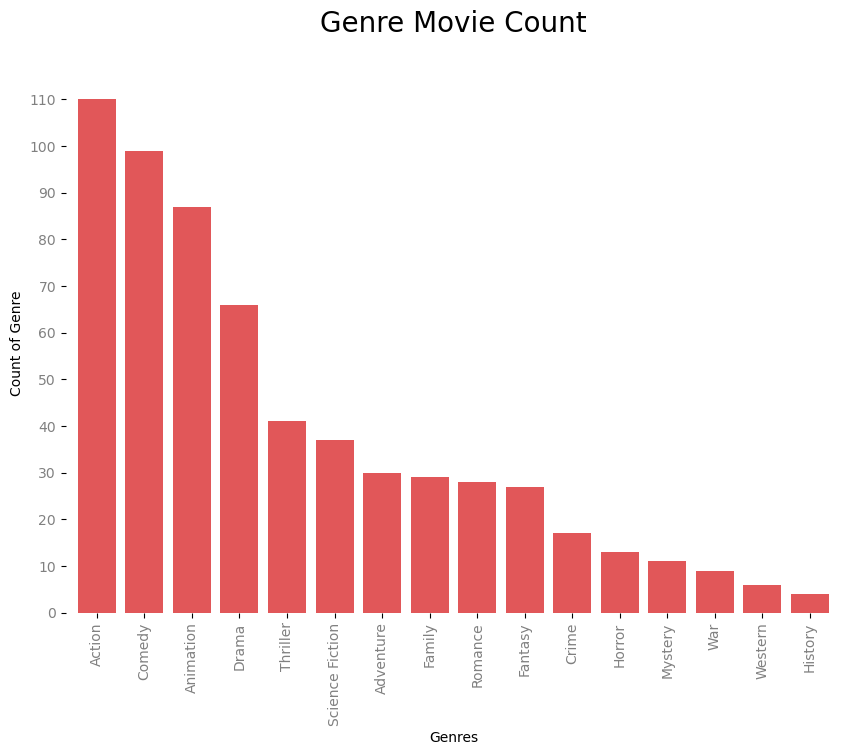

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plot 1. Bar Chart - Genre Movie Count

ax = (
    df.groupby("genre")["genre"]
    .count()
    .sort_values(ascending=False)
    .plot(kind="bar", color="#E15759", width=0.8, figsize=(10, 7))
)
ax.set_yticks(range(0, 120, 10))
[ax.spines[spine].set_visible(False)
 for spine in ["top", "right", "bottom", "left"]]

plt.title("Genre Movie Count", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Count of Genre")
plt.xlabel("Genres")
plt.xlabel("Genres")

Text(0.5, 0, 'Genres')

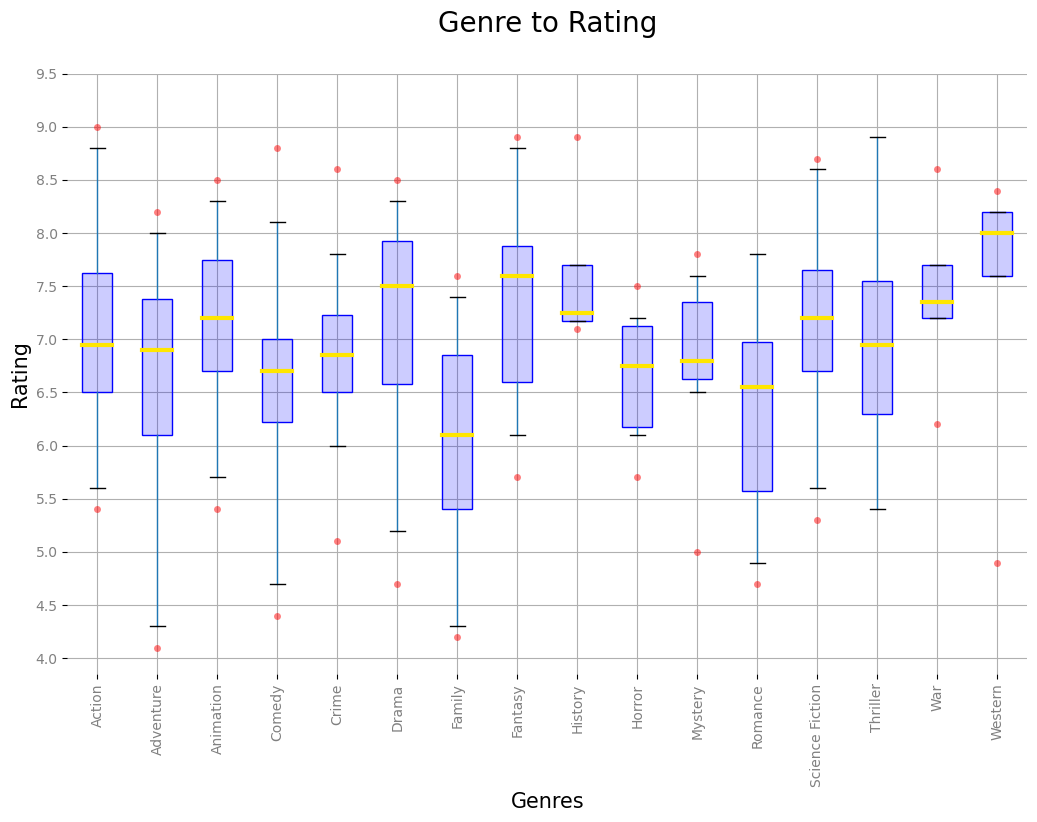

In [33]:
# Plot 2. Box Chart - Genre to Rating

boxprops = dict(color="blue", facecolor=(0, 0, 1, 0.2))
flierprops = dict(
    marker="o", markerfacecolor=(1, 0, 0, 0.5), markeredgecolor="none", markersize=5
)
medianprops = dict(linewidth=3, color=(1, 0.9, 0, 1))
ax = df.boxplot(
    by="genre",
    column=["rating"],
    figsize=(12, 8),
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    whis=[1, 99],
    patch_artist=True,
)

fig = ax.get_figure()
fig.suptitle("")
ax.set_yticks(np.arange(4, 10, 0.5))
[ax.spines[spine].set_visible(False)
 for spine in ["top", "right", "bottom", "left"]]

plt.title("Genre to Rating", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Rating", fontsize=15)
plt.xlabel("Genres", fontsize=15)
plt.xlabel("Genres", fontsize=15)

Text(0.5, 0, 'Runtime (bins)')

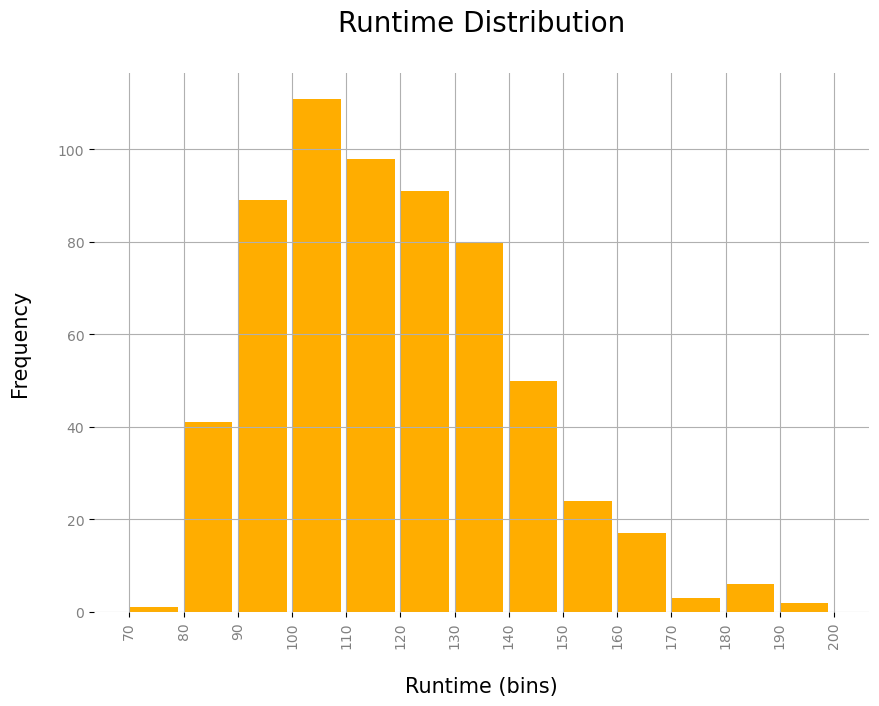

In [34]:
# Plot 3. Histogram - Runtime Distribution

ax = plt.axes()
fig = ax.get_figure()
fig.set_size_inches(10, 7)

hg = df.hist(
    column="runtime", bins=np.arange(70, 210, 10), color=(1, 0.68, 0), width=9, ax=ax
)
[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]
ax.set_xticks(np.arange(70, 210, 10))

plt.title("Runtime Distribution", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Frequency", fontsize=15, labelpad=20)
plt.xlabel("Runtime (bins)", fontsize=15, labelpad=20)
plt.xlabel("Runtime (bins)", fontsize=15, labelpad=20)

Text(0, 0.5, '')

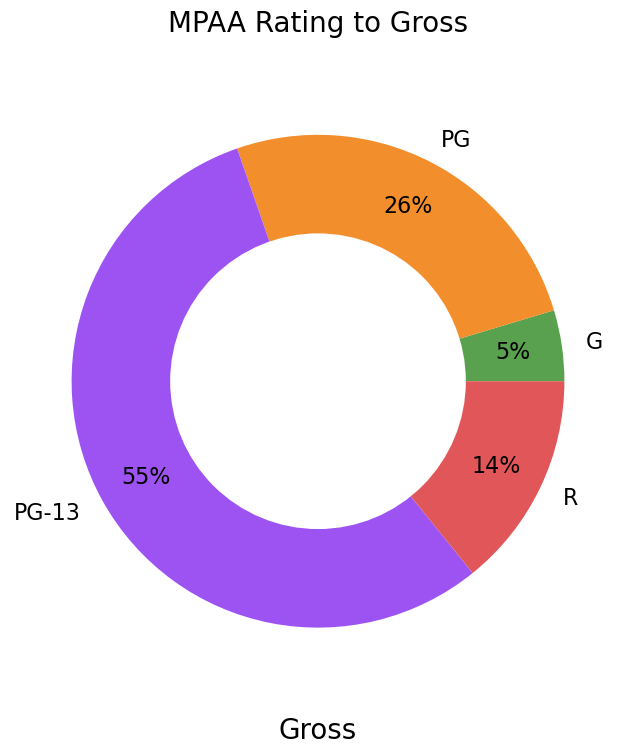

In [35]:
# Plot 4. Pie Chart - MPAA Rating to Gross

colors = ["#59a14f", "#f28e2b", "#9d53f2", "#e15759"]
explode = (0, 0, 0, 0)
textprops = {"fontsize": 16}
pie = (
    df.groupby(["mpaa_rating"])["gross"]
    .sum()
    .plot(
        kind="pie",
        y="gross",
        autopct="%1.0f%%",
        figsize=(8, 8),
        colors=colors,
        explode=explode,
        textprops=textprops,
        labeldistance=1.1,
        pctdistance=0.8,
    )
)
hole = plt.Circle((0, 0), 0.6, facecolor="white")
plt.title("MPAA Rating to Gross", fontsize=20, pad=30)
plt.gcf().gca().add_artist(hole)
plt.xlabel("Gross", fontsize=20, labelpad=20)
plt.ylabel("")

Text(0.5, 0, 'Year of Release Date')

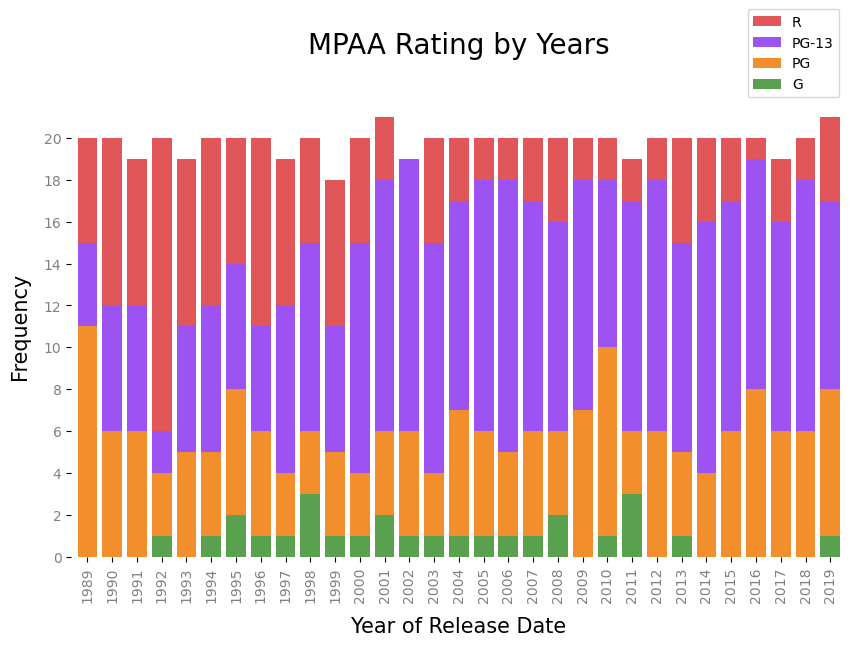

In [36]:
# Plot 5. Stacked Bar Chart - MPAA Rating by Years

colors = ["#59a14f", "#f28e2b", "#9d53f2", "#e15759"]
ax = (
    df.groupby([df["release_date"].dt.year, "mpaa_rating"])["mpaa_rating"]
    .count()
    .unstack()
    .plot(kind="bar", width=0.8, figsize=(10, 6), stacked=True, color=colors)
)

[ax.spines[spine].set_visible(False)
 for spine in ["top", "right", "bottom", "left"]]
ax.set_yticks(np.arange(0, 22, 2))
handles, labels = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1.2))

plt.title("MPAA Rating by Years", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Frequency", fontsize=15, labelpad=10)
plt.xlabel("Year of Release Date", fontsize=15, labelpad=10)
plt.xlabel("Year of Release Date", fontsize=15, labelpad=10)

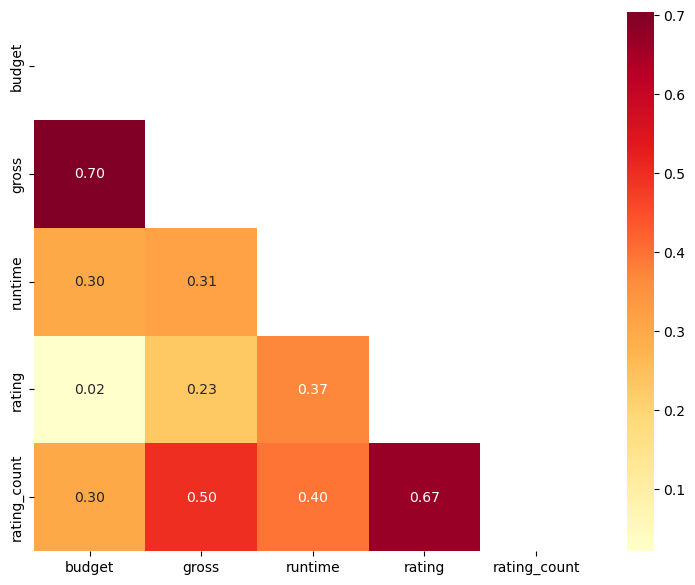

In [37]:
import seaborn as sb

# Plot 6. Heatmap - Correlation Matrix

plt.figure(figsize=(9, 7))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sb.heatmap(
    df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="YlOrRd", mask=mask
)
plt.show()

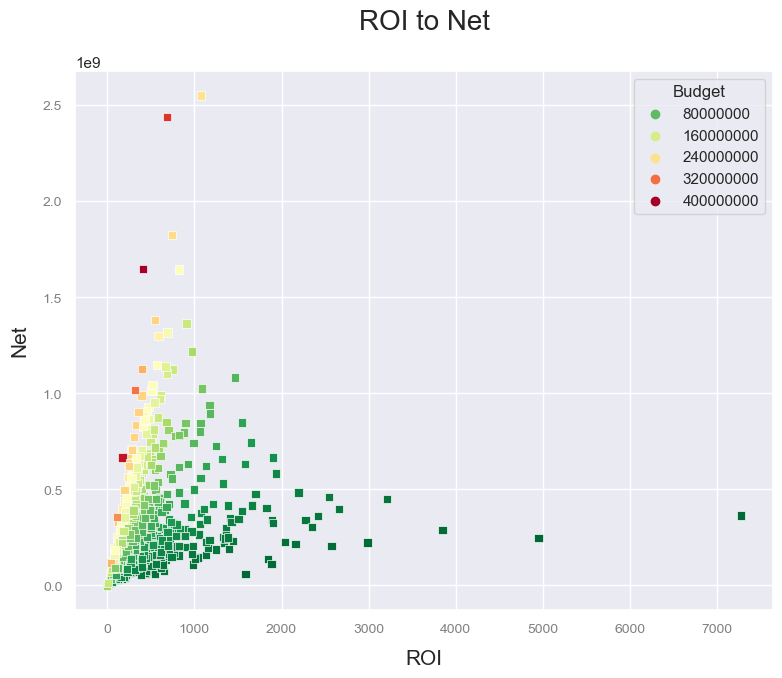

In [38]:
# Plot 7. Scatter Plot - ROI to Net

sb.set_theme()
plt.figure(figsize=(9, 7))
df["net"] = (df["gross"] - df["budget"]).astype(np.int64)
df["roi"] = (df["net"] / df["budget"] * 100).astype("int")
pal = sb.color_palette("RdYlGn_r", as_cmap=True)

ax = plt.axes()
fig = ax.get_figure()

sb.scatterplot(
    data=df,
    x="roi",
    y="net",
    hue="budget",
    palette=pal,
    marker="s",
)
sb.axes_style

plt.title("ROI to Net", fontsize=20, pad=30)
plt.xticks(fontsize=10, color="grey")
plt.yticks(fontsize=10, color="grey")
plt.ylabel("Net", fontsize=15, labelpad=10)
plt.xlabel("ROI", fontsize=15, labelpad=10)
plt.legend(title='Budget')